In [22]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


# Load the data
data = pd.read_csv(r"C:\Users\ragha\OneDrive\Documents\College Work\Core Subjects\Software_Engineering_5th_sem\SE_PROJECT\Flight-Price-Prediction-Project\scrape_data\data.csv")

# Rename columns to match the required format
data = data.rename(columns={
    'Company': 'flight_name',
    'Date': 'date',
    'Departure Time': 'departure_time',
    'Origin': 'departure_loc',
    'Duration Time': 'flight_duration',
    'Arrival Time': 'arrival_time',
    'Destination': 'arrival_loc',
    'Flight Price': 'price'
})

# Remove commas in 'price' and handle any non-numeric issues by coercing to NaN
data['price'] = pd.to_numeric(data['price'].replace('[,]', '', regex=True), errors='coerce')

# Drop rows with NaN in 'price' if needed
data = data.dropna(subset=['price'])

# Convert 'price' to integer
data['price'] = data['price'].astype(int)

# Set 'stops' to 'non-stop' by default
data['stops'] = 'non-stop'

# Reorder columns to match the format in the code
data = data[['flight_name', 'date', 'departure_time', 'departure_loc', 
         'flight_duration', 'stops', 'arrival_time', 'arrival_loc', 'price']]

# Save the preprocessed dataset
#data.to_csv('preprocessed_dataset_flight_price.csv', index=False)
data.head()


,flight_name,date,departure_time,departure_loc,flight_duration,stops,arrival_time,arrival_loc,price
0,Air India,04-11-2024,05:55,BOM,2h 35m,non-stop,08:30,CCU,8021
1,Air India,04-11-2024,06:50,BOM,2h 40m,non-stop,09:30,CCU,9638
2,Vistara,04-11-2024,06:50,BOM,2h 40m,non-stop,09:30,CCU,9202
3,IndiGo,04-11-2024,06:10,BOM,2h 30m,non-stop,08:40,CCU,6708
4,IndiGo,04-11-2024,13:35,BOM,2h 30m,non-stop,16:05,CCU,6708


In [23]:
# Display the first 10 rows to see the data structure
print(data.head(10))

# Check for any missing values
print(data.isnull().sum())

# Get detailed information about data types and memory usage
print(data.info())


  flight_name        date departure_time departure_loc flight_duration  \
0   Air India  04-11-2024          05:55           BOM          2h 35m   
1   Air India  04-11-2024          06:50           BOM          2h 40m   
2     Vistara  04-11-2024          06:50           BOM          2h 40m   
3      IndiGo  04-11-2024          06:10           BOM          2h 30m   
4      IndiGo  04-11-2024          13:35           BOM          2h 30m   
5      IndiGo  04-11-2024          13:35           BOM          2h 30m   
6      IndiGo  04-11-2024          06:10           BOM          2h 30m   
7      IndiGo  04-11-2024          13:35           BOM          2h 30m   
8      IndiGo  04-11-2024          06:10           BOM          2h 30m   
9      IndiGo  04-11-2024          13:35           BOM          2h 30m   

      stops arrival_time arrival_loc  price  
0  non-stop        08:30         CCU   8021  
1  non-stop        09:30         CCU   9638  
2  non-stop        09:30         CCU   9202  
3

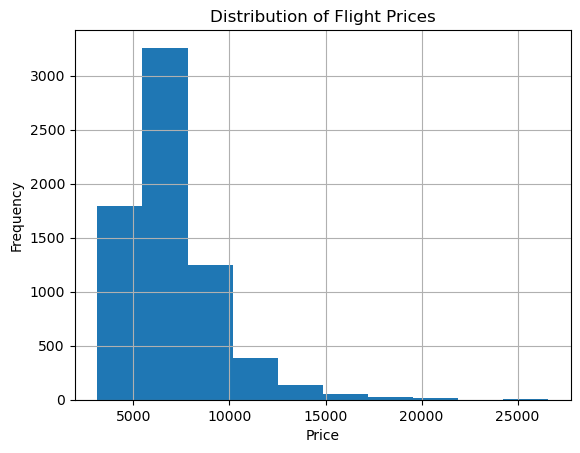

In [24]:
# Plot a histogram to check the price distribution
data['price'].hist()
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of Flight Prices')
plt.show()


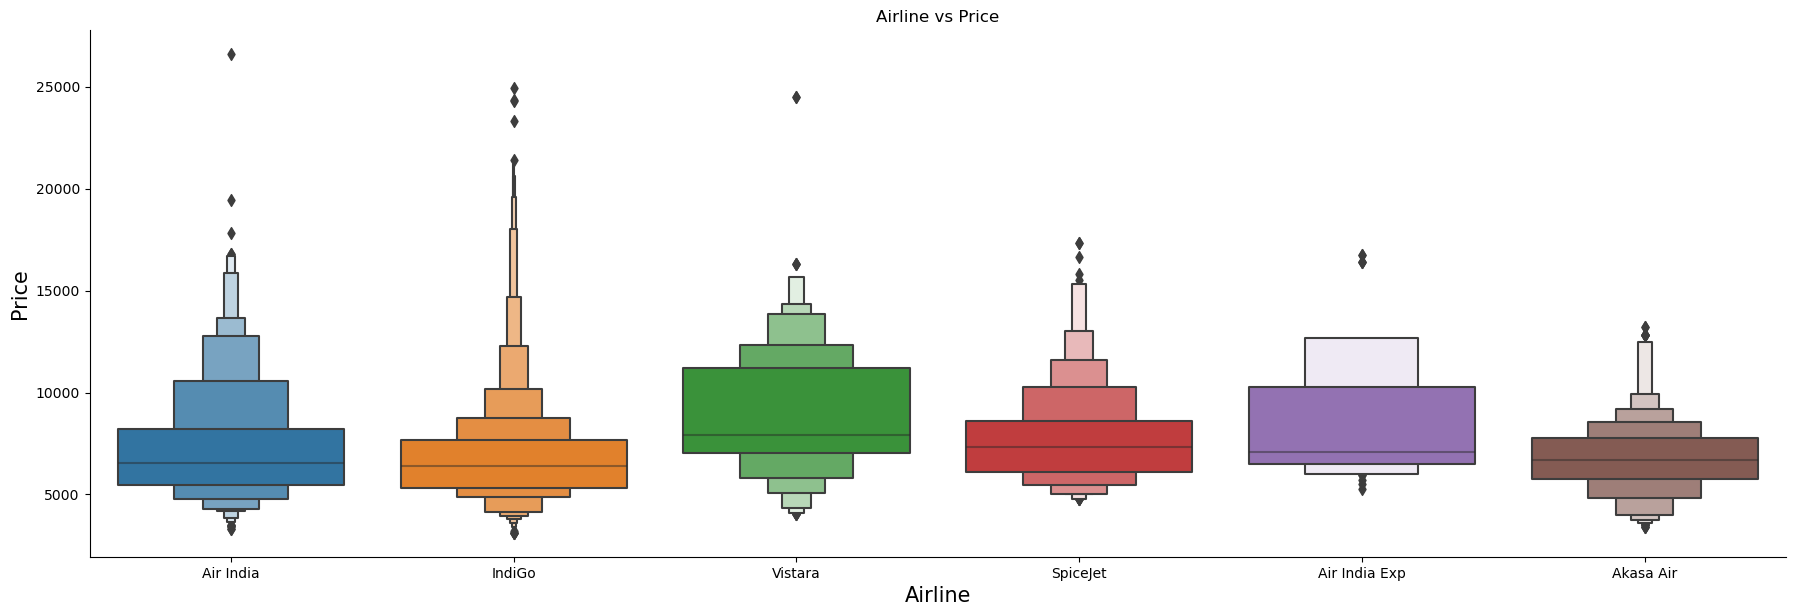

In [25]:
# Boxen plot to view price variations across different airlines
sns.catplot(
    y='price', 
    x='flight_name', 
    data=data.sort_values('price', ascending=False),
    kind='boxen',
    height=6, 
    aspect=3
)
plt.xlabel('Airline', size=15)
plt.ylabel('Price', size=15)
plt.title('Airline vs Price')
plt.show()


In [26]:
# Extract hour and minute from 'departure_time' 
data['dep_hour'] = pd.to_datetime(data['departure_time'].astype(str)).dt.hour
data['dep_min'] = pd.to_datetime(data['departure_time'].astype(str)).dt.minute

# Extract hour and minute from 'arrival_time'
data['arr_hour'] = pd.to_datetime(data['arrival_time'].astype(str)).dt.hour
data['arr_min'] = pd.to_datetime(data['arrival_time'].astype(str)).dt.minute

# Extract day and month from the 'date' column
data['Journey_Day'] = pd.to_datetime(data['date']).dt.day
data['Journey_Month'] = pd.to_datetime(data['date']).dt.month

# Drop unnecessary columns
data.drop(['date', 'departure_time', 'arrival_time'], axis=1, inplace=True)

data


C:\Users\ragha\AppData\Local\Temp\ipykernel_7940\1215914505.py:10: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Journey_Day'] = pd.to_datetime(data['date']).dt.day
C:\Users\ragha\AppData\Local\Temp\ipykernel_7940\1215914505.py:11: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Journey_Month'] = pd.to_datetime(data['date']).dt.month


,flight_name,departure_loc,flight_duration,stops,arrival_loc,price,dep_hour,dep_min,arr_hour,arr_min,Journey_Day,Journey_Month
0,Air India,BOM,2h 35m,non-stop,CCU,8021,5,55,8,30,11,4
1,Air India,BOM,2h 40m,non-stop,CCU,9638,6,50,9,30,11,4
2,Vistara,BOM,2h 40m,non-stop,CCU,9202,6,50,9,30,11,4
3,IndiGo,BOM,2h 30m,non-stop,CCU,6708,6,10,8,40,11,4
4,IndiGo,BOM,2h 30m,non-stop,CCU,6708,13,35,16,5,11,4
...,...,...,...,...,...,...,...,...,...,...,...,...
6933,IndiGo,BLR,2h 05m,non-stop,BOM,6347,19,15,21,20,13,11
6934,IndiGo,BLR,2h 05m,non-stop,BOM,6374,18,0,20,5,13,11
6935,IndiGo,BLR,2h,non-stop,BOM,6750,20,30,22,30,13,11
6936,IndiGo,BLR,1h 50m,non-stop,BOM,7164,16,45,18,35,13,11


In [27]:
data['stops'].value_counts()

non-stop    6937
Name: stops, dtype: int64

In [28]:
data.replace({'non-stop': 0}, inplace=True)


In [29]:
data['stops'].value_counts()

0    6937
Name: stops, dtype: int64

In [30]:
# Step 1: Ensure flight durations are in the correct format
duration = list(data['flight_duration'])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:  # Check if both hours and minutes are present
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"  # Append '0m' if minutes are missing
        else:
            duration[i] = "0h " + duration[i]  # Append '0h' if hours are missing

# Step 2: Split the durations into hours and minutes
duration_hours = []
duration_mins = []

for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep="h")[0]))  # Extract hours
    duration_mins.append(int(duration[i].split(sep="m")[0].split()[-1]))  # Extract minutes

# Step 3: Add the results to the DataFrame
data['duration_hours'] = duration_hours
data['duration_mins'] = duration_mins


In [31]:
data.drop(['flight_duration'], axis=1, inplace=True)


In [32]:
data['flight_name'].value_counts()

IndiGo           4844
Air India         861
Akasa Air         494
Vistara           409
SpiceJet          290
Air India Exp      39
Name: flight_name, dtype: int64

In [33]:
# Extract the 'flight_name' column
Airline = data['flight_name']

# Apply one-hot encoding
Airline = pd.get_dummies(Airline, drop_first=True)

# Display the result
Airline.head()


,Air India Exp,Akasa Air,IndiGo,SpiceJet,Vistara
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,1
3,0,0,1,0,0
4,0,0,1,0,0


In [34]:
# List of columns to check for value counts
list1 = ['departure_loc', 'arrival_loc']

# Print value counts for each location column
for l in list1:
    print(data[[l]].value_counts(), '\n')


departure_loc
BOM              4063
DEL               931
HYD               537
MAA               494
CCU               487
BLR               423
Fas                 2
dtype: int64 

arrival_loc
BOM            2872
DEL             988
BLR             903
HYD             834
CCU             715
MAA             618
IDR               5
ght               2
dtype: int64 



In [35]:
data = pd.concat([data, Airline], axis=1)
print(data.head())  # To verify if the Airline columns are successfully added


  flight_name departure_loc  stops arrival_loc  price  dep_hour  dep_min  \
0   Air India           BOM      0         CCU   8021         5       55   
1   Air India           BOM      0         CCU   9638         6       50   
2     Vistara           BOM      0         CCU   9202         6       50   
3      IndiGo           BOM      0         CCU   6708         6       10   
4      IndiGo           BOM      0         CCU   6708        13       35   

   arr_hour  arr_min  Journey_Day  Journey_Month  duration_hours  \
0         8       30           11              4               2   
1         9       30           11              4               2   
2         9       30           11              4               2   
3         8       40           11              4               2   
4        16        5           11              4               2   

   duration_mins  Air India Exp  Akasa Air  IndiGo  SpiceJet  Vistara  
0             35              0          0       0         0  

In [36]:
data.drop(['flight_name'], axis=1, inplace=True)
print(data.head())  # Verify the drop operation


  departure_loc  stops arrival_loc  price  dep_hour  dep_min  arr_hour  \
0           BOM      0         CCU   8021         5       55         8   
1           BOM      0         CCU   9638         6       50         9   
2           BOM      0         CCU   9202         6       50         9   
3           BOM      0         CCU   6708         6       10         8   
4           BOM      0         CCU   6708        13       35        16   

   arr_min  Journey_Day  Journey_Month  duration_hours  duration_mins  \
0       30           11              4               2             35   
1       30           11              4               2             40   
2       30           11              4               2             40   
3       40           11              4               2             30   
4        5           11              4               2             30   

   Air India Exp  Akasa Air  IndiGo  SpiceJet  Vistara  
0              0          0       0         0        0  
1 

In [37]:
# Check the shape of the dataset
print(data.shape)

# Check the list of column names
print(data.columns)


(6937, 17)
Index(['departure_loc', 'stops', 'arrival_loc', 'price', 'dep_hour', 'dep_min',
       'arr_hour', 'arr_min', 'Journey_Day', 'Journey_Month', 'duration_hours',
       'duration_mins', 'Air India Exp', 'Akasa Air', 'IndiGo', 'SpiceJet',
       'Vistara'],
      dtype='object')


In [38]:
print(data.columns)

Index(['departure_loc', 'stops', 'arrival_loc', 'price', 'dep_hour', 'dep_min',
       'arr_hour', 'arr_min', 'Journey_Day', 'Journey_Month', 'duration_hours',
       'duration_mins', 'Air India Exp', 'Akasa Air', 'IndiGo', 'SpiceJet',
       'Vistara'],
      dtype='object')


In [39]:
# One-hot encode the 'departure_loc' and 'arrival_loc' columns within this cell
data = pd.get_dummies(data, columns=['departure_loc', 'arrival_loc'])

# Now, create the feature matrix X using the updated columns after one-hot encoding
X = data.loc[:, ['stops', 'dep_hour', 'dep_min', 'arr_hour', 'arr_min',
                 'Journey_Day', 'Journey_Month', 'duration_hours', 'duration_mins',
                 'Air India Exp', 'Akasa Air', 'IndiGo', 'SpiceJet', 'Vistara'] + 
                 [col for col in data.columns if 'departure_loc_' in col or 'arrival_loc_' in col]]

# Display the first 5 rows of the feature matrix
print(X.head())


   stops  dep_hour  dep_min  arr_hour  arr_min  Journey_Day  Journey_Month  \
0      0         5       55         8       30           11              4   
1      0         6       50         9       30           11              4   
2      0         6       50         9       30           11              4   
3      0         6       10         8       40           11              4   
4      0        13       35        16        5           11              4   

   duration_hours  duration_mins  Air India Exp  ...  departure_loc_HYD  \
0               2             35              0  ...                  0   
1               2             40              0  ...                  0   
2               2             40              0  ...                  0   
3               2             30              0  ...                  0   
4               2             30              0  ...                  0   

   departure_loc_MAA  arrival_loc_BLR  arrival_loc_BOM  arrival_loc_CCU  \
0    

0    8021
1    9638
2    9202
3    6708
4    6708
Name: price, dtype: int32


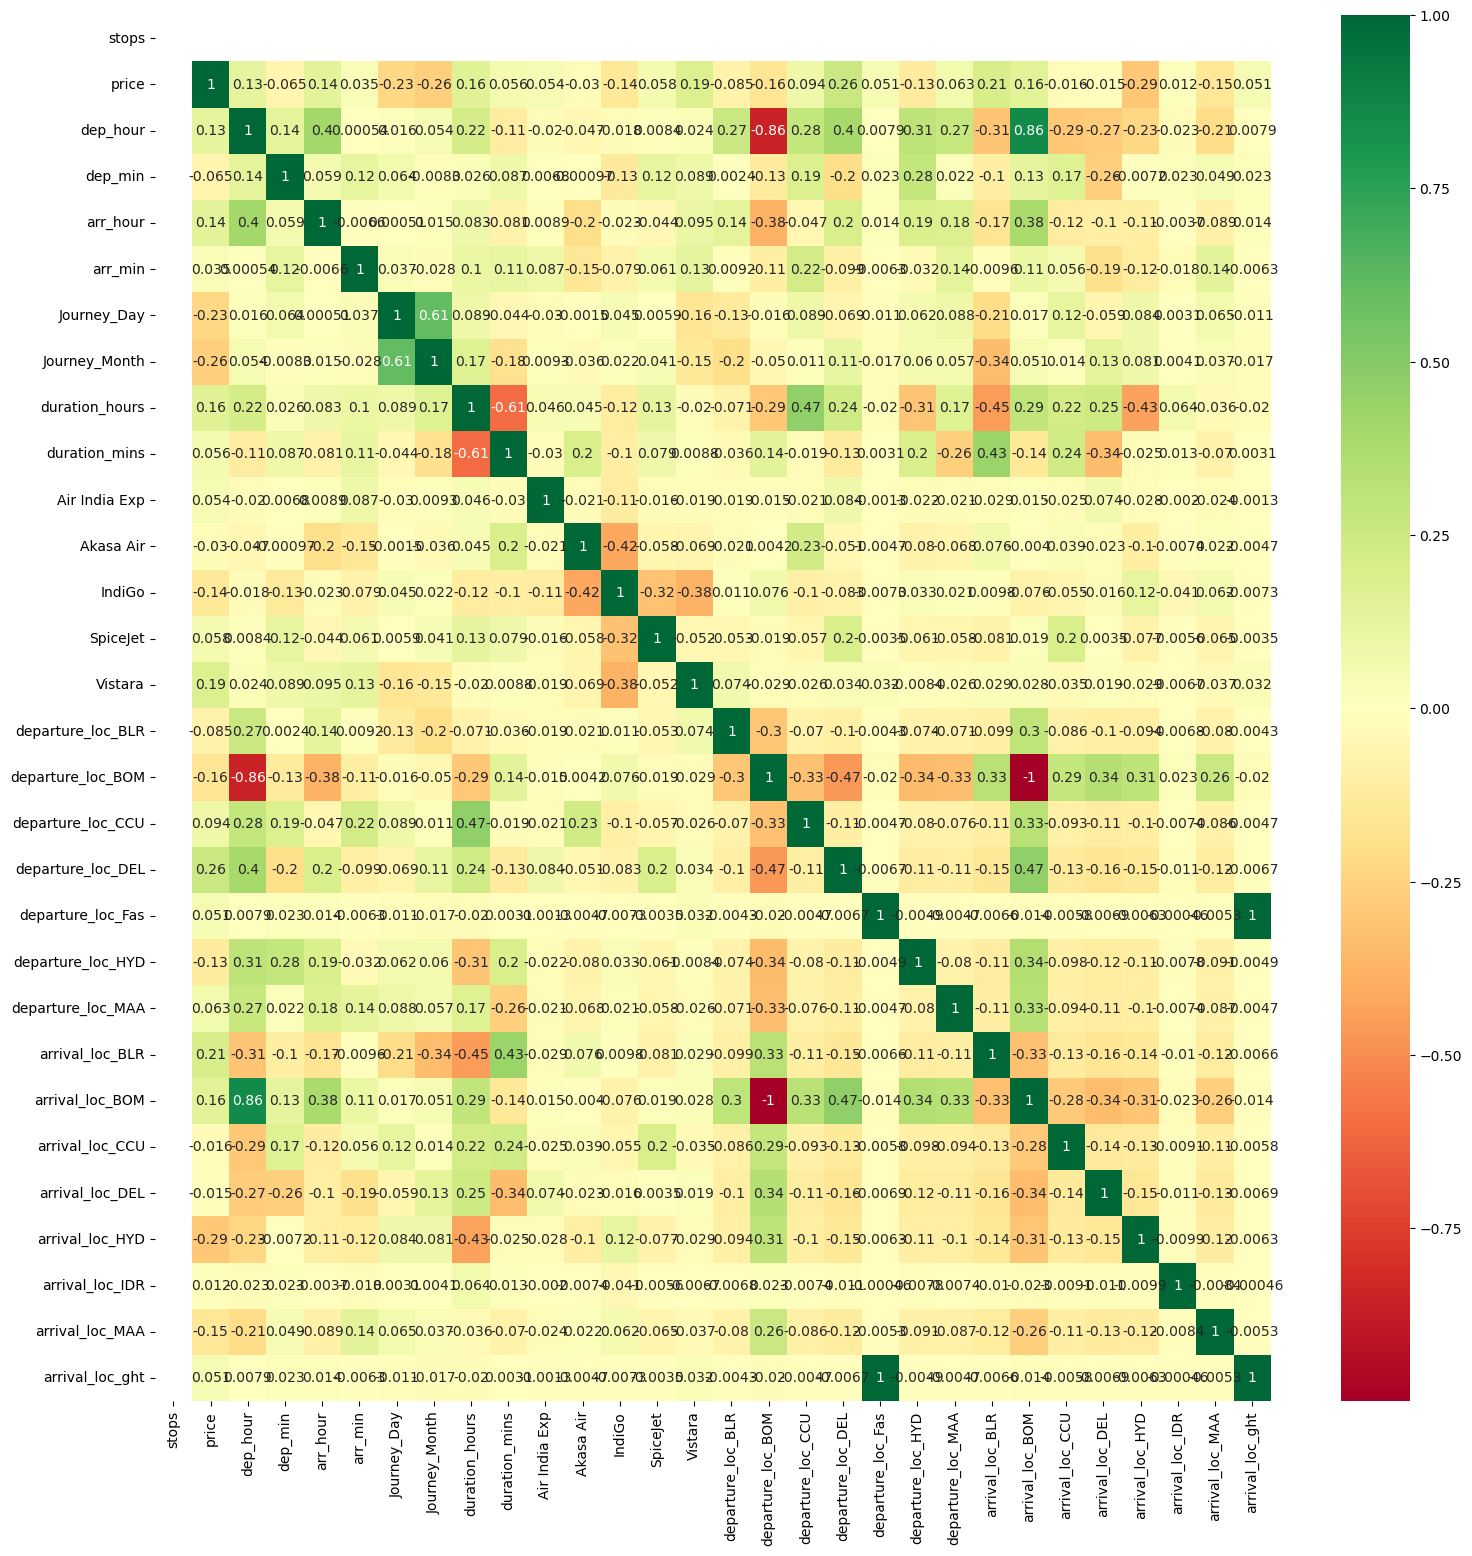

In [40]:
y = data.iloc[:, 1]  # Target variable is the 'price' column
print(y.head())

plt.figure(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')
plt.show()

[0.00000000e+00 6.80656418e-02 3.82549486e-02 6.40662742e-02
 4.26743831e-02 9.45624652e-02 2.81509994e-01 7.65766772e-03
 3.25145965e-02 4.93077329e-04 9.20226616e-03 2.65754194e-02
 5.26064604e-03 3.52857993e-02 3.62029275e-03 2.55522623e-03
 2.64856341e-02 5.47098534e-02 1.18736271e-03 3.70874690e-03
 2.42296574e-02 5.96336872e-02 7.33179699e-03 5.70285898e-03
 5.11368041e-03 8.94985752e-02 1.50592018e-04 8.79762403e-03
 1.15123204e-03]


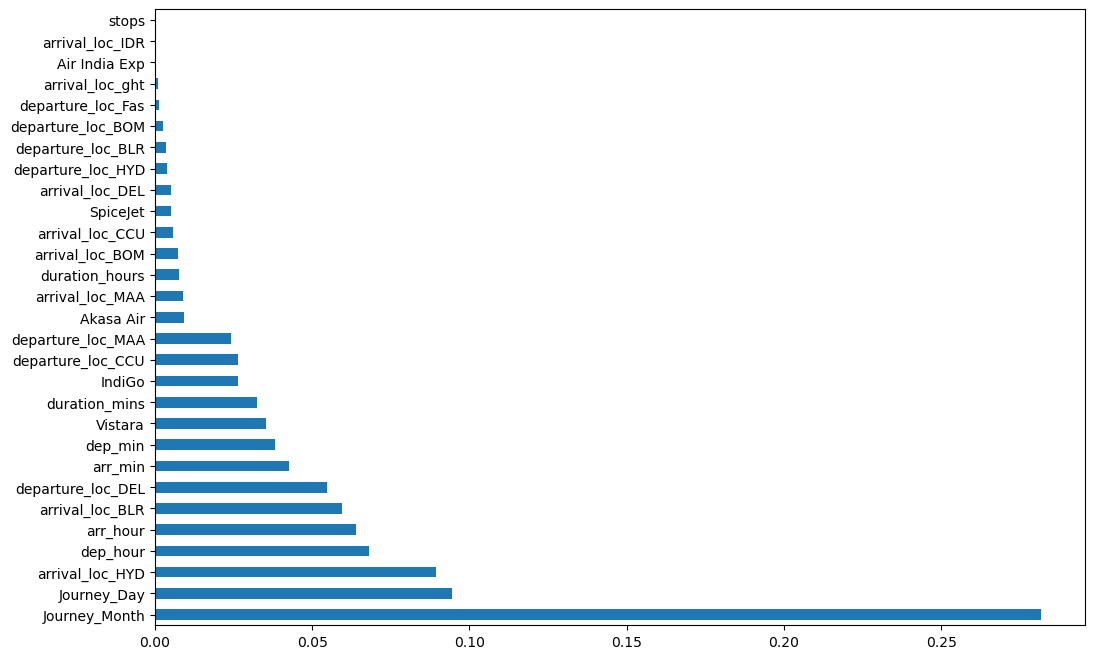

In [41]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)
print(selection.feature_importances_)
import matplotlib.pyplot as plt
import pandas as pd

# Plot the feature importances
plt.figure(figsize=(12, 8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(30).plot(kind='barh')
plt.show()


In [42]:
# Separate the features (X) and target variable (y)
x = data.drop(['price'], axis=1)
y = data['price']

# Import the StandardScaler
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale the features
data1 = scaler.fit_transform(x)

# Print the scaled data of the first row
print(data1[0])


[ 0.         -1.14977233  1.62517127 -0.56951652  0.24609377 -0.64980422
 -1.802124    0.6065524   0.47962113 -0.07519184 -0.27689774 -1.52130906
 -0.20887485 -0.25030619 -0.25482751  0.84104643 -0.27477969 -0.3937152
 -0.01698211 -0.28966576 -0.27689774 -0.38684877 -0.84054688  2.94993185
 -0.40752709 -0.36966756 -0.02685689 -0.31273037 -0.01698211]


In [43]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (70% training, 30% testing)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=123)

# Check the shapes of the resulting data splits
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)


(4855, 29) (2082, 29) (4855,) (2082,)


In [44]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Train the ExtraTreesRegressor model
selection = ExtraTreesRegressor()
selection.fit(x_train, y_train)

# Function to evaluate metrics
def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R_Squared_Value:', r2_score(y_true, y_pred))

# Custom accuracy function based on MAPE
def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors / y_true)
    accuracy = 100 - mape
    return accuracy

# Predictions on the test set
y_pred = selection.predict(x_test)

# Evaluate the model using RMSE, R-squared, and accuracy
metrics(y_test, y_pred)
print(f'Accuracy: {accuracy(y_test, y_pred)}%')


RMSE: 843.1485839604312
R_Squared_Value: 0.8648046400167106
Accuracy: 91.73120664862928%


RMSE: 1849.3688957237687
R_Squared_Value: 0.34956986452444283
Accuracy: 80.61863552006122%


C:\Users\ragha\AppData\Local\Temp\ipykernel_7940\1260891677.py:34: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals, bins=30)  # You can adjust the number of bins as needed


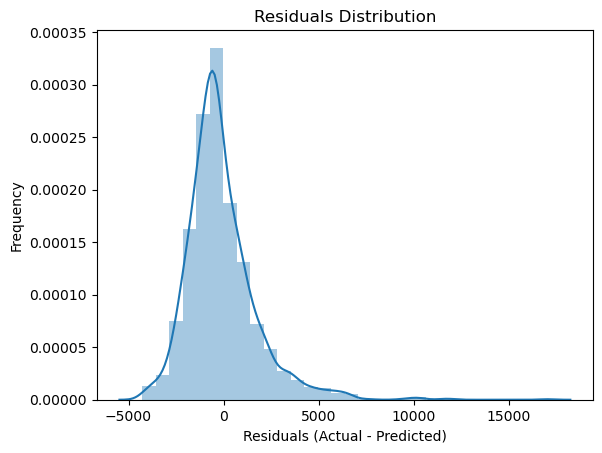

In [45]:
# Importing Linear Regression model
from sklearn.linear_model import LinearRegression

# Create a Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(x_train, y_train)

# Predict on the test data
y_pred = model.predict(x_test)

# Define the metrics function (same as before)
def metrics(y_true, y_pred):
    print(f'RMSE:', mean_squared_error(y_true, y_pred) ** 0.5)
    print(f'R_Squared_Value:', r2_score(y_true, y_pred))
    
def accuracy(y_true, y_pred):
    errors = abs(y_true - y_pred)
    mape = 100 * np.mean(errors/y_true)
    accuracy = 100 - mape
    return accuracy

# Calculate and print the metrics
metrics(y_test, y_pred)
accuracy_value = accuracy(y_test, y_pred)

# Print accuracy separately
print(f'Accuracy: {accuracy_value}%')
# Calculate residuals (actual - predicted)
residuals = y_test - y_pred

# Plot the distribution of residuals
sns.distplot(residuals, bins=30)  # You can adjust the number of bins as needed
plt.title('Residuals Distribution')
plt.xlabel('Residuals (Actual - Predicted)')
plt.ylabel('Frequency')
plt.show()


In [46]:
!pip install xgboost



In [47]:
import xgboost as xg

# Initialize the XGBoost Regressor
xgb_r = xg.XGBRegressor(objective='reg:squarederror', n_estimators=10, seed=123)

# Train the model
xgb_r.fit(x_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=10, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

RMSE: 1206.2515705048809
R_Squared_Value: 0.7232871418604746
Accuracy: 87.27247282671155


C:\Users\ragha\AppData\Local\Temp\ipykernel_7940\2551978270.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - pred)


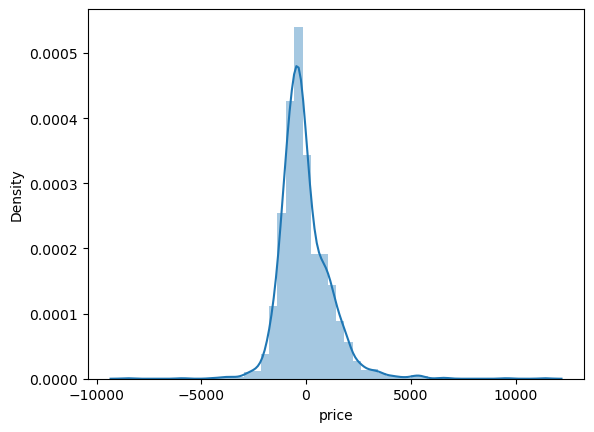

In [48]:
pred = xgb_r.predict(x_test)
metrics(y_test, pred)
accuracy_score = accuracy(y_test, pred)
print("Accuracy:", accuracy_score)
sns.distplot(y_test - pred)
plt.show()



RMSE: 837.3803976527524
R_Squared_Value: 0.8666481217659695
Accuracy: 91.47617845218093%


C:\Users\ragha\AppData\Local\Temp\ipykernel_7940\2039316631.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - pred_rf)


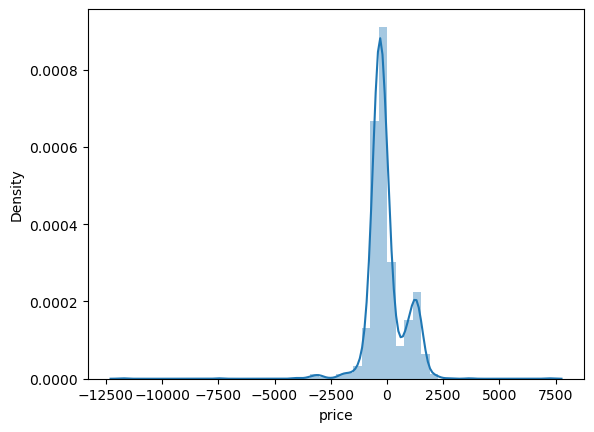

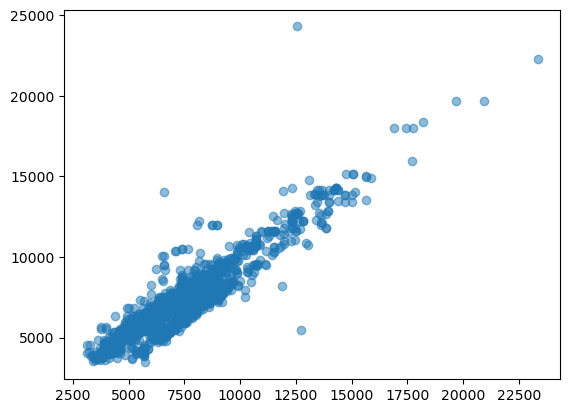

In [49]:
# Train the Random Forest Regressor model
from sklearn.ensemble import RandomForestRegressor

model_random_forest = RandomForestRegressor(n_estimators=100, min_samples_split=3)
model_random_forest.fit(x_train, y_train)

# Make predictions
pred_rf = model_random_forest.predict(x_test)

# Evaluate the model's performance
metrics(y_test, pred_rf)
accuracy_score_rf = accuracy(y_test, pred_rf)
print(f"Accuracy: {accuracy_score_rf}%")

# Plot the residuals
sns.distplot(y_test - pred_rf)
plt.show()

# Scatter plot of actual vs predicted values
plt.scatter(y_test, pred_rf, alpha=0.5)
plt.show()


In [50]:
import pickle

# Saving the trained model to a file
model = model_random_forest  # model_random_forest is your trained model
pickle.dump(model, open("flight.pkl", 'wb'))
